In [10]:
# Run this cell only once if libraries are not installed
!pip install numpy pandas matplotlib seaborn scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [11]:
import sys
sys.path.append('..')

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Load Results Data

In [12]:
results_dir = Path('../results')

results_files = {
    'grid_mnist': 'grid_mnist_20251021_011057.json',
    'grid_cifar10': 'grid_cifar10_20251021_050052.json',
    'random_mnist': 'random_mnist_20251021_010819.json',
    'random_cifar10': 'random_cifar10_20251021_041728.json',
    'ga_mnist': 'ga_mnist_20251021_101942.json',
    'ga_cifar10': 'ga_cifar10_20251022_073914.json',
    'pso_mnist': 'pso_mnist_20251021_181551.json',
    'pso_cifar10': 'pso_cifar10_20251022_164435.json',
    'de_mnist': 'de_mnist_20251021_152823.json',
    'de_cifar10': 'de_cifar10_20251022_210512.json'
}

data = {}
for key, filename in results_files.items():
    filepath = results_dir / filename
    with open(filepath) as f:
        data[key] = json.load(f)

print(f"Loaded {len(data)} result files")

Loaded 10 result files


## Figure 1: Experimental Workflow

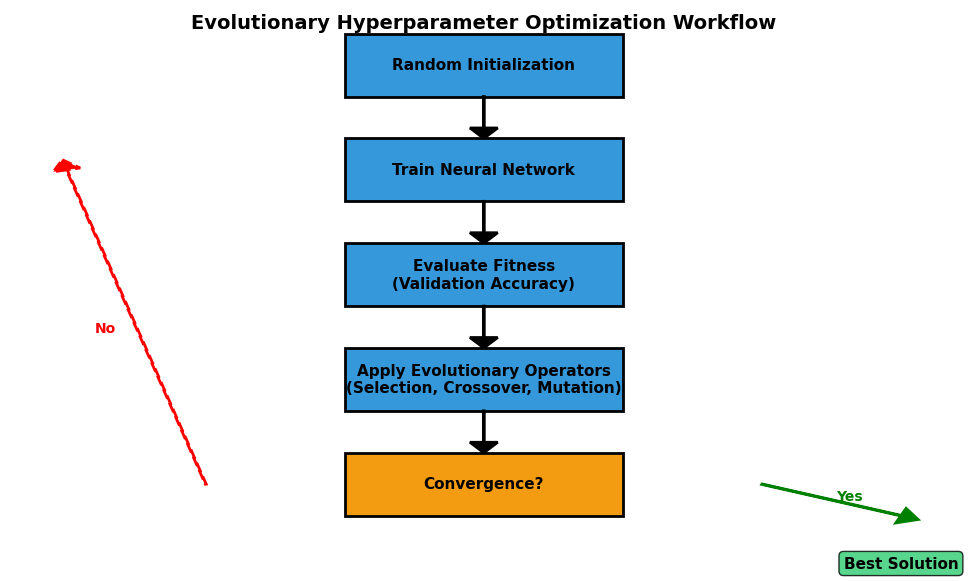

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

steps = [
    'Random Initialization',
    'Train Neural Network',
    'Evaluate Fitness\n(Validation Accuracy)',
    'Apply Evolutionary Operators\n(Selection, Crossover, Mutation)',
    'Convergence?'
]

y_positions = [0.85, 0.65, 0.45, 0.25, 0.05]
box_height = 0.12

for i, (step, y) in enumerate(zip(steps, y_positions)):
    if i == 4:
        ax.add_patch(plt.Rectangle((0.35, y), 0.3, box_height, 
                                   facecolor='#f39c12', edgecolor='black', linewidth=2))
    else:
        ax.add_patch(plt.Rectangle((0.35, y), 0.3, box_height, 
                                   facecolor='#3498db', edgecolor='black', linewidth=2))
    ax.text(0.5, y + box_height/2, step, ha='center', va='center', 
            fontsize=11, fontweight='bold')
    
    if i < len(steps) - 1:
        ax.arrow(0.5, y, 0, -0.06, head_width=0.03, head_length=0.02, 
                fc='black', ec='black', linewidth=2)

ax.arrow(0.2, 0.11, -0.15, 0.6, head_width=0.03, head_length=0.02,
        fc='red', ec='red', linewidth=2, linestyle='--')
ax.text(0.08, 0.4, 'No', fontsize=10, fontweight='bold', color='red')

ax.arrow(0.8, 0.11, 0.15, -0.06, head_width=0.03, head_length=0.02,
        fc='green', ec='green', linewidth=2)
ax.text(0.88, 0.08, 'Yes', fontsize=10, fontweight='bold', color='green')

ax.text(0.95, -0.05, 'Best Solution', ha='center', fontsize=11, 
        fontweight='bold', bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.8))

ax.text(0.5, 0.98, 'Evolutionary Hyperparameter Optimization Workflow', 
        ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/figure1_workflow.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure 2: Performance Comparison

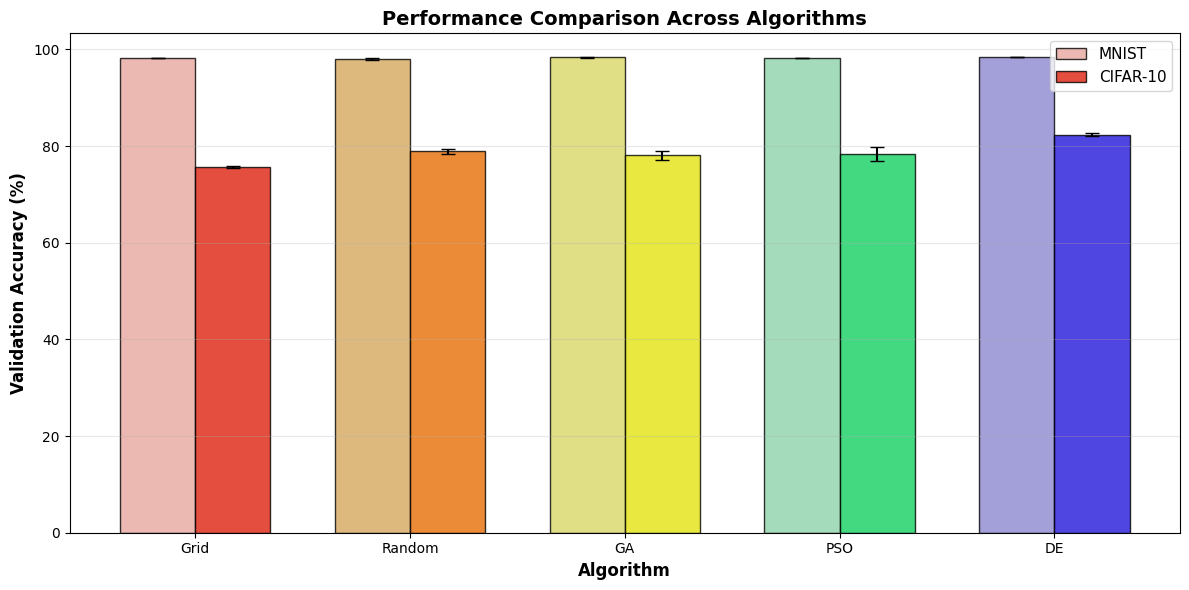

MNIST Results:
  Grid: 98.26% ± 0.02%
  Random: 98.06% ± 0.23%
  GA: 98.32% ± 0.02%
  PSO: 98.23% ± 0.07%
  DE: 98.39% ± 0.01%

CIFAR-10 Results:
  Grid: 75.69% ± 0.16%
  Random: 78.89% ± 0.58%
  GA: 78.08% ± 0.96%
  PSO: 78.41% ± 1.48%
  DE: 82.35% ± 0.32%

Average Computational Time per Run (hours):

MNIST:
------------------------------------------------------------
  Grid       1.28 ± 0.00 hours
  Random     1.26 ± 0.01 hours
  GA         3.28 ± 0.25 hours
  PSO        3.49 ± 0.21 hours
  DE         4.38 ± 0.95 hours

CIFAR-10:
------------------------------------------------------------
  Grid       2.56 ± 0.03 hours
  Random     2.31 ± 0.08 hours
  GA         7.95 ± 0.08 hours
  PSO        7.37 ± 0.37 hours
  DE         8.82 ± 0.52 hours


In [14]:
algorithms = ['Grid', 'Random', 'GA', 'PSO', 'DE']

mnist_means = []
mnist_stds = []
cifar10_means = []
cifar10_stds = []

for algo in algorithms:
    mnist_key = f"{algo.lower()}_mnist"
    cifar10_key = f"{algo.lower()}_cifar10"
    
    mnist_accuracies = [run['best_fitness'] for run in data[mnist_key]['runs']]
    cifar10_accuracies = [run['best_fitness'] for run in data[cifar10_key]['runs']]
    
    mnist_means.append(np.mean(mnist_accuracies))
    mnist_stds.append(np.std(mnist_accuracies))
    cifar10_means.append(np.mean(cifar10_accuracies))
    cifar10_stds.append(np.std(cifar10_accuracies))

x = np.arange(len(algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

colors_mnist = ["#e7a69f", "#d6a85e", "#d9d768", "#8cd3aa", "#8c87d0"]
colors_cifar = ["#de220e", "#e66e06", "#e3e310", "#14d062", "#2316d9"]

bars1 = ax.bar(x - width/2, mnist_means, width, yerr=mnist_stds, 
               label='MNIST', color=colors_mnist, capsize=5, alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, cifar10_means, width, yerr=cifar10_stds,
               label='CIFAR-10', color=colors_cifar, capsize=5, alpha=0.8, edgecolor='black')

ax.set_xlabel('Algorithm', fontweight='bold', fontsize=12)
ax.set_ylabel('Validation Accuracy (%)', fontweight='bold', fontsize=12)
ax.set_title('Performance Comparison Across Algorithms', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure2_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("MNIST Results:")
for algo, mean, std in zip(algorithms, mnist_means, mnist_stds):
    print(f"  {algo}: {mean:.2f}% ± {std:.2f}%")

print("\nCIFAR-10 Results:")
for algo, mean, std in zip(algorithms, cifar10_means, cifar10_stds):
    print(f"  {algo}: {mean:.2f}% ± {std:.2f}%")

# Computational Time Analysis
print("\n" + "=" * 60)
print("Average Computational Time per Run (hours):")
print("=" * 60)

for dataset in ['MNIST', 'CIFAR-10']:
    print(f"\n{dataset}:")
    print("-" * 60)
    
    for algo in algorithms:
        key = f"{algo.lower()}_{dataset.lower().replace('-', '')}"
        
        # Extract time in seconds from all runs
        times_seconds = [run['time_seconds'] for run in data[key]['runs']]
        
        # Convert to hours
        times_hours = [t / 3600 for t in times_seconds]
        
        mean_time_hours = np.mean(times_hours)
        std_time_hours = np.std(times_hours)
        
        print(f"  {algo:<10} {mean_time_hours:.2f} ± {std_time_hours:.2f} hours")

## Figure 3: Convergence Curves

In [15]:
print("Checking data structure:")
print(f"GA MNIST run keys: {list(data['ga_mnist']['runs'][0].keys())}")
print(f"\nFirst 5 history items from GA MNIST:")
for i, item in enumerate(data['ga_mnist']['runs'][0]['evaluation_history'][:5]):
    print(f"  Iteration {i}: {item}")
    
print(f"\nTotal evaluations in GA MNIST run 1: {len(data['ga_mnist']['runs'][0]['evaluation_history'])}")

# Check if fitness values are changing
ga_fitnesses = [item['fitness'] for item in data['ga_mnist']['runs'][0]['evaluation_history']]
print(f"\nGA fitness progression (first 10): {ga_fitnesses[:10]}")
print(f"Min: {min(ga_fitnesses):.2f}, Max: {max(ga_fitnesses):.2f}")

Checking data structure:
GA MNIST run keys: ['run', 'best_fitness', 'best_hyperparameters', 'evaluation_history', 'total_evaluations', 'time_seconds']

First 5 history items from GA MNIST:
  Iteration 0: {'evaluation': 1, 'hyperparameters': {'learning_rate': 0.00917089742216361, 'batch_size': 256, 'dropout_rate': 0.040241803721382585, 'hidden_units': 256, 'optimizer': 'sgd', 'weight_decay': 0.0068373977364520845, '_training_results': {'final_val_accuracy': 98.08333333333333, 'final_val_loss': 0.09189941646887902, 'best_val_accuracy': 98.31666666666666, 'best_val_loss': 0.08547736450712731, 'total_epochs': 50, 'total_training_time': 224.24641489982605, 'average_epoch_time': 4.484824204444886, 'converged': False, 'history': {'train_loss': [0.47458484174406274, 0.2132126841139286, 0.1693184899681426, 0.14281005630309276, 0.12651782732536185, 0.11381959701155095, 0.10341443539537648, 0.09705519636577749, 0.08913290910819109, 0.08339150352997983, 0.07974849254923298, 0.0763256458684485, 0.0

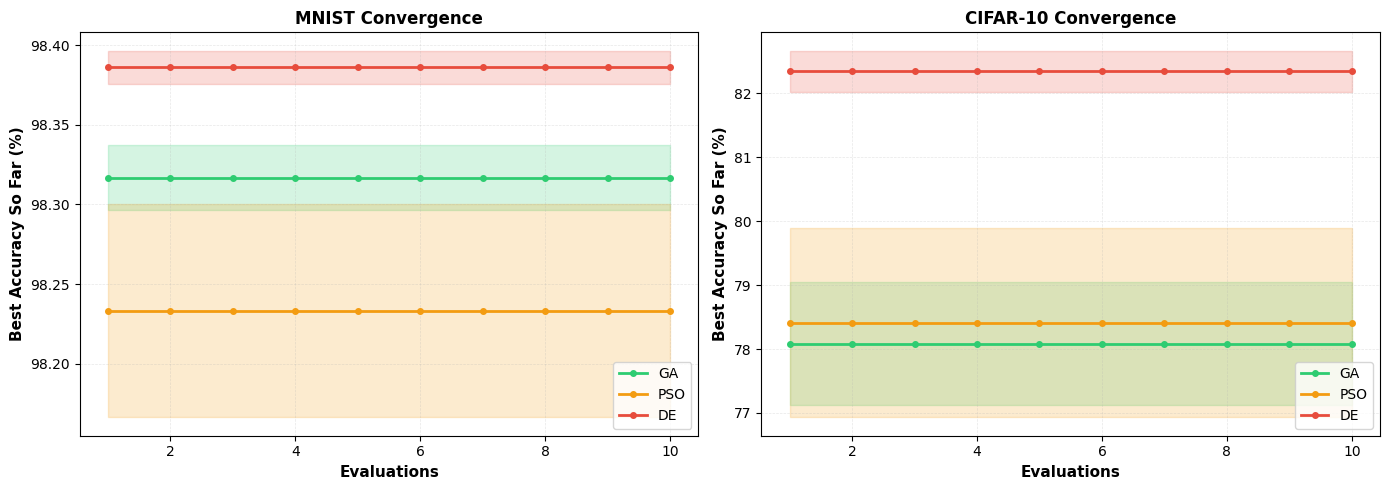

[OK] Saved figure3_convergence.png

Convergence Analysis:

MNIST:
------------------------------------------------------------
  GA     First:  98.32%  →  Final:  98.32%  (Δ +0.00%)
  PSO    First:  98.23%  →  Final:  98.23%  (Δ +0.00%)
  DE     First:  98.39%  →  Final:  98.39%  (Δ +0.00%)

  Traditional Methods (best of 20 evaluations):
  Grid    98.26% ± 0.02%
  Random  98.06% ± 0.23%

CIFAR-10:
------------------------------------------------------------
  GA     First:  78.08%  →  Final:  78.08%  (Δ +0.00%)
  PSO    First:  78.41%  →  Final:  78.41%  (Δ +0.00%)
  DE     First:  82.35%  →  Final:  82.35%  (Δ +0.00%)

  Traditional Methods (best of 20 evaluations):
  Grid    75.69% ± 0.16%
  Random  78.89% ± 0.58%


In [16]:
def mean_best_so_far(data_dict):
    """
    Compute mean best-so-far fitness across runs, aligned by evaluation index.
    Returns: (eval_axis: list, mean_values: np.ndarray, std_values: np.ndarray)
    """
    per_run = []
    for r in data_dict.get("runs", []):
        hist = r.get("evaluation_history", [])
        if not hist:
            continue
        # Extract evaluations and fitness
        pairs = [(h["evaluation"], h["fitness"]) for h in hist]
        pairs.sort(key=lambda x: x[0])
        evals, fits = zip(*pairs)
        
        # Compute best-so-far within the run
        best = []
        cur = -np.inf
        for f in fits:
            cur = max(cur, f)
            best.append(cur)
        per_run.append((list(evals), best))
    
    if not per_run:
        return [], np.array([]), np.array([])
    
    max_eval = max(e[-1] for e, _ in per_run)
    eval_axis = list(range(1, max_eval + 1))
    
    # Align all runs to same evaluation axis
    aligned = []
    for evals, best in per_run:
        step_map = {e: b for e, b in zip(evals, best)}
        seq = []
        last = np.nan
        for e in eval_axis:
            if e in step_map:
                last = step_map[e]
            seq.append(last)
        aligned.append(seq)
    
    arr = np.array(aligned, dtype=float)
    mean_vals = np.nanmean(arr, axis=0)
    std_vals = np.nanstd(arr, axis=0)
    return eval_axis, mean_vals, std_vals


def plot_convergence_curves(results, title, ax, colors):
    """
    Plot convergence curves for multiple algorithms on given axis.
    
    Parameters
    ----------
    results : dict
        Dictionary mapping algorithm names -> (x_values, y_values, std_values)
    title : str
        Plot title
    ax : matplotlib axis
        Axis to plot on
    colors : dict
        Color mapping for each algorithm
    """
    for name, (xs, ys, stds) in results.items():
        if xs is None or ys is None or len(xs) == 0:
            continue
        
        if name in ['Grid', 'Random']:
            # Plot as horizontal line for traditional methods
            ax.axhline(y=ys, color=colors[name], linestyle='--', 
                      linewidth=2, label=name, alpha=0.7)
        else:
            # Plot with error bands for evolutionary algorithms
            ax.plot(xs, ys, marker='o', label=name, 
                   color=colors[name], linewidth=2, markersize=4)
            if stds is not None:
                ax.fill_between(xs, ys - stds, ys + stds, 
                              alpha=0.2, color=colors[name])
    
    ax.set_xlabel('Evaluations', fontweight='bold', fontsize=11)
    ax.set_ylabel('Best Accuracy So Far (%)', fontweight='bold', fontsize=11)
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)


# Prepare data for both datasets
colors = {'Grid': '#2980b9', 'Random': '#85c1e9', 'GA': '#2ecc71', 
          'PSO': '#f39c12', 'DE': '#e74c3c'}

datasets = {
    'mnist': 'MNIST',
    'cifar10': 'CIFAR-10'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for (dataset_key, dataset_name), ax in zip(datasets.items(), [ax1, ax2]):
    results = {}
    
    # Process evolutionary algorithms
    for algo in ['GA', 'PSO', 'DE']:
        key = f"{algo.lower()}_{dataset_key}"
        xs, ys, stds = mean_best_so_far(data[key])
        if len(xs) > 0:
            results[algo] = (xs, ys, stds)
    
    # Process traditional methods (single best value as horizontal line)
    for algo in ['Grid', 'Random']:
        key = f"{algo.lower()}_{dataset_key}"
        accuracies = [run['best_fitness'] for run in data[key]['runs']]
        mean_acc = np.mean(accuracies)
        results[algo] = (None, mean_acc, None)
    
    # Plot
    plot_convergence_curves(results, f'{dataset_name} Convergence', ax, colors)

plt.tight_layout()
plt.savefig('../figures/figure3_convergence.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved figure3_convergence.png")

# Print convergence analysis
print("\n" + "=" * 60)
print("Convergence Analysis:")
print("=" * 60)

for dataset_key, dataset_name in datasets.items():
    print(f"\n{dataset_name}:")
    print("-" * 60)
    
    for algo in ['GA', 'PSO', 'DE']:
        key = f"{algo.lower()}_{dataset_key}"
        xs, ys, stds = mean_best_so_far(data[key])
        if len(ys) > 0:
            first_eval = ys[0]
            final_eval = ys[-1]
            improvement = final_eval - first_eval
            print(f"  {algo:<6} First: {first_eval:6.2f}%  →  "
                  f"Final: {final_eval:6.2f}%  (Δ {improvement:+.2f}%)")
    
    # Show traditional methods for comparison
    print(f"\n  Traditional Methods (best of 20 evaluations):")
    for algo in ['Grid', 'Random']:
        key = f"{algo.lower()}_{dataset_key}"
        accuracies = [run['best_fitness'] for run in data[key]['runs']]
        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        print(f"  {algo:<6} {mean_acc:6.2f}% ± {std_acc:.2f}%")

## Figure 4: Distribution Analysis (Box Plots)

/var/folders/nw/wk97mvvj16gcm9ps3pxjs5z40000gn/T/ipykernel_90612/2579203414.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(mnist_data_list, labels=algorithms, patch_artist=True,
/var/folders/nw/wk97mvvj16gcm9ps3pxjs5z40000gn/T/ipykernel_90612/2579203414.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(cifar10_data_list, labels=algorithms, patch_artist=True,


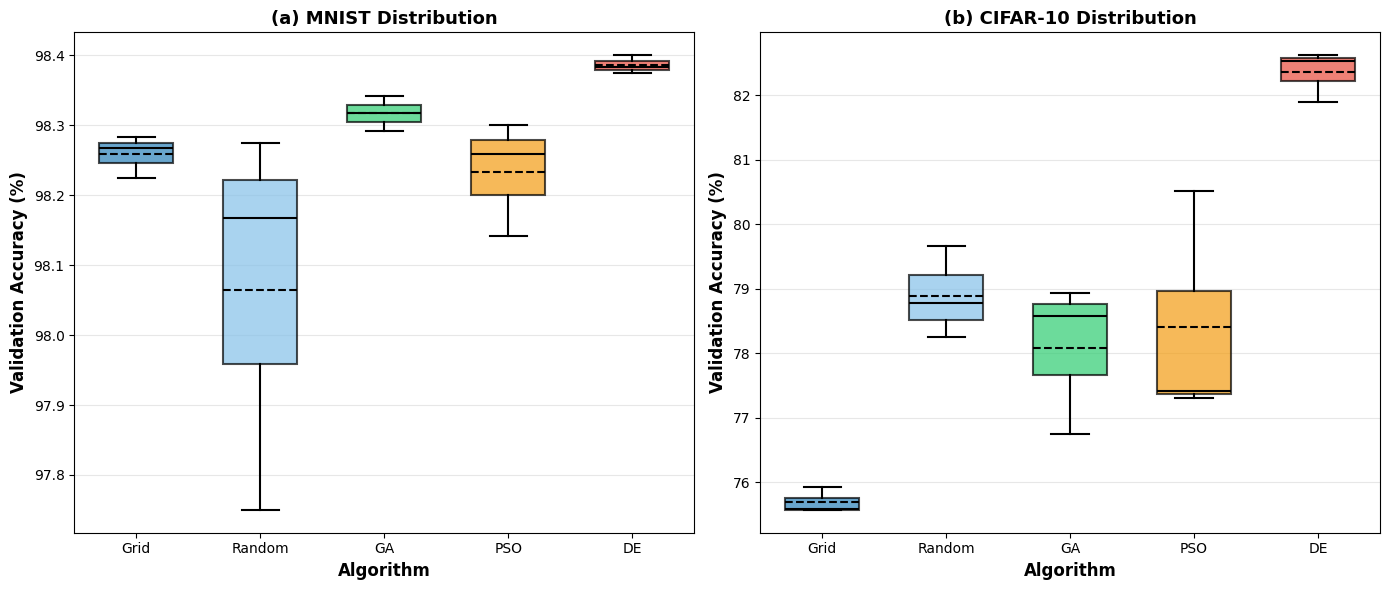

Variance Analysis (Standard Deviation):

MNIST:
  Grid: σ = 0.025%
  Random: σ = 0.226%
  GA: σ = 0.020%
  PSO: σ = 0.067%
  DE: σ = 0.010%

CIFAR-10:
  Grid: σ = 0.163%
  Random: σ = 0.582%
  GA: σ = 0.961%
  PSO: σ = 1.483%
  DE: σ = 0.320%


In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

algorithms = ['Grid', 'Random', 'GA', 'PSO', 'DE']
colors = {'Grid': '#2980b9', 'Random': '#85c1e9', 'GA': '#2ecc71', 
          'PSO': '#f39c12', 'DE': '#e74c3c'}

# MNIST box plots
mnist_data_list = []
for algo in algorithms:
    key = f"{algo.lower()}_mnist"
    accuracies = [run['best_fitness'] for run in data[key]['runs']]
    mnist_data_list.append(accuracies)

bp1 = ax1.boxplot(mnist_data_list, labels=algorithms, patch_artist=True,
                  showmeans=True, meanline=True, widths=0.6)

for patch, algo in zip(bp1['boxes'], algorithms):
    patch.set_facecolor(colors[algo])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', linewidth=1.5)

ax1.set_ylabel('Validation Accuracy (%)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Algorithm', fontweight='bold', fontsize=12)
ax1.set_title('(a) MNIST Distribution', fontweight='bold', fontsize=13)
ax1.grid(axis='y', alpha=0.3)

# CIFAR-10 box plots
cifar10_data_list = []
for algo in algorithms:
    key = f"{algo.lower()}_cifar10"
    accuracies = [run['best_fitness'] for run in data[key]['runs']]
    cifar10_data_list.append(accuracies)

bp2 = ax2.boxplot(cifar10_data_list, labels=algorithms, patch_artist=True,
                  showmeans=True, meanline=True, widths=0.6)

for patch, algo in zip(bp2['boxes'], algorithms):
    patch.set_facecolor(colors[algo])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp2[element], color='black', linewidth=1.5)

ax2.set_ylabel('Validation Accuracy (%)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Algorithm', fontweight='bold', fontsize=12)
ax2.set_title('(b) CIFAR-10 Distribution', fontweight='bold', fontsize=13)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure4_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# Print variance analysis
print("Variance Analysis (Standard Deviation):")
print("\nMNIST:")
for algo, acc_data in zip(algorithms, mnist_data_list):
    print(f"  {algo}: σ = {np.std(acc_data):.3f}%")

print("\nCIFAR-10:")
for algo, acc_data in zip(algorithms, cifar10_data_list):
    print(f"  {algo}: σ = {np.std(acc_data):.3f}%")

In [ ]:

# === Convergence Curves (Clean Version) ===
# This cell loads the available JSON logs, computes mean best-so-far accuracy
# across runs (aligned by evaluation index), and plots convergence curves.
#
# Notes:
# - Uses matplotlib only (no seaborn), one figure per dataset.
# - No explicit color choices.
# - Gracefully skips missing files (e.g., GA if not attached).

from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

def mean_best_so_far(data: dict):
    """Compute mean best-so-far fitness across runs, aligned by evaluation index.
    Missing later evaluations in shorter runs are forward-filled with the last known best.
    Returns: (eval_axis: list[int], mean_values: np.ndarray)"""
    per_run = []
    for r in data.get("runs", []):
        hist = r.get("evaluation_history", [])
        if not hist:
            continue
        # sort by evaluation index
        pairs = sorted(((h["evaluation"], h["fitness"]) for h in hist), key=lambda x: x[0])
        evals, fits = zip(*pairs)
        # best-so-far within the run
        best = []
        cur = -np.inf
        for f in fits:
            cur = max(cur, f)
            best.append(cur)
        per_run.append((list(evals), best))

    if not per_run:
        return [], np.array([])

    max_eval = max(e[-1] for e, _ in per_run)
    eval_axis = list(range(1, max_eval + 1))

    aligned = []
    for evals, best in per_run:
        step_map = {e: b for e, b in zip(evals, best)}
        seq = []
        last = np.nan
        for e in eval_axis:
            if e in step_map:
                last = step_map[e]
            seq.append(last)
        aligned.append(seq)

    arr = np.array(aligned, dtype=float)
    mean_vals = np.nanmean(arr, axis=0)
    return eval_axis, mean_vals

def plot_dataset(name: str, alg_to_path: dict, outdir: Path):
    """Plot convergence curves for a dataset given a mapping of algorithm -> json path."""
    plt.figure(figsize=(7, 5), dpi=150)
    plotted_any = False

    for alg, p in alg_to_path.items():
        path = Path(p)
        if not path.exists():
            print(f"[WARN] Missing file for {name} / {alg}: {path}")
            continue
        with path.open("r") as f:
            data = json.load(f)
        xs, ys = mean_best_so_far(data)
        if xs and ys.size > 0:
            plt.plot(xs, ys, label=alg)  # no explicit colors
            plotted_any = True
        else:
            print(f"[WARN] No evaluation data in {path}")

    if not plotted_any:
        print(f"[WARN] Nothing to plot for {name}")
        plt.close()
        return

    plt.xlabel("Evaluation")
    plt.ylabel("Best validation accuracy (%)")
    plt.title(f"Convergence Curves — {name}")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    outpath = outdir / f"convergence_{name.lower().replace('-', '').replace(' ', '_')}.png"
    plt.tight_layout()
    plt.savefig(outpath, bbox_inches="tight")
    plt.show()
    print(f"[OK] Saved {outpath}")

# ---- Configure the files that are present in this workspace ----
FILES = {
    "CIFAR-10": {
        "DE":     "/mnt/data/de_cifar10_20251022_210512.json",
        "PSO":    "/mnt/data/pso_cifar10_20251022_164435.json",
        "Grid":   "/mnt/data/grid_cifar10_20251021_050052.json",
        "Random": "/mnt/data/random_cifar10_20251021_041728.json",
        "GA":     "/mnt/data/ga_cifar10_20251022_073914.json",
    },
    "MNIST": {
        "DE":     "/mnt/data/de_mnist_20251021_152823.json",
        "PSO":    "/mnt/data/pso_mnist_20251021_181551.json",
        "Grid":   "/mnt/data/grid_mnist_20251021_011057.json",
        "Random": "/mnt/data/random_mnist_20251021_010819.json",
        "GA":   "/mnt/data/ga_mnist_20251021_101942.json",
    },
}

# ---- Run the plots (saves PNGs alongside showing them inline) ----
OUTDIR = Path("/mnt/data")
for dataset, mapping in FILES.items():
    plot_dataset(dataset, mapping, OUTDIR)


[WARN] Missing file for CIFAR-10 / DE: /mnt/data/de_cifar10_20251022_210512.json
[WARN] Missing file for CIFAR-10 / PSO: /mnt/data/pso_cifar10_20251022_164435.json
[WARN] Missing file for CIFAR-10 / Grid: /mnt/data/grid_cifar10_20251021_050052.json
[WARN] Missing file for CIFAR-10 / Random: /mnt/data/random_cifar10_20251021_041728.json
[WARN] Missing file for CIFAR-10 / GA: /mnt/data/ga_cifar10_20251022_073914.json
[WARN] Nothing to plot for CIFAR-10
[WARN] Missing file for MNIST / DE: /mnt/data/de_mnist_20251021_152823.json
[WARN] Missing file for MNIST / PSO: /mnt/data/pso_mnist_20251021_181551.json
[WARN] Missing file for MNIST / Grid: /mnt/data/grid_mnist_20251021_011057.json
[WARN] Missing file for MNIST / Random: /mnt/data/random_mnist_20251021_010819.json
[WARN] Nothing to plot for MNIST
